# Local Outlier Factor (LOF)

## Pengertian LOF

LOF (Local Outlier Factor) adalah sebuah algoritma yang digunakan untuk mendeteksi outlier (data yang menyimpang atau anomali) dalam sebuah dataset. Berbeda dengan metode outlier detection tradisional yang hanya melihat distribusi global data, LOF bekerja dengan membandingkan kepadatan lokal (local density) suatu titik data dengan kepadatan lokal titik-titik tetangganya. Ini membuat LOF sangat efektif untuk mendeteksi outlier di dataset yang memiliki kepadatan data yang tidak seragam.

## Bagaimana LOF menentukan titik outlier?

1. **Hitung jarak antar titik**: Cek seberapa dekat titik-titik dalam dataset.

2. **Tentukan tetangga terdekat (k-nearest neighbors)**: Kita pakai k = 3, jadi tiap titik punya 3 tetangga terdekat.

3. **Hitung k-Distance**: Jarak ke tetangga ke-k terdekat.

4. **Hitung Reachability Distance (RD)**: Seberapa jauh titik bisa dicapai dari tetangganya.

5. **Hitung Local Reachability Density (LRD)**: Seberapa padat suatu titik dibandingkan dengan tetangganya.

6. **Hitung LOF Score**: Perbandingan kepadatan titik dengan tetangganya.

7. **Tentukan outlier atau bukan**:
    - Jika LOF ≈ 1, maka titik normal (inlier).
    - Jika LOF > 1.5, maka titik kemungkinan outlier.

## Preview Data

Kita pakai dataset dengan nilai antara 20-80, dengan beberapa titik ekstrem yang berpotensi sebagai outlier.

In [1]:
%pip install pandas -qq
import pandas as pd

df = pd.read_csv('LOF-Data.csv')
df

Note: you may need to restart the kernel to use updated packages.


,ID,X,Y
0,1,25,30
1,2,27,32
2,3,30,35
3,4,50,55
4,5,52,57
5,6,54,60
6,7,75,78
7,8,80,79
8,9,22,80
9,10,77,25


## Perhitungan Manual LOF

### Langkah 1: Menentukan Tetangga Terdekat untuk k = 3

Kita hitung jarak antar titik dan ambil 3 tetangga terdekat untuk masing-masing titik.

1. Titik (25,30):
    - Tetangga terdekat → (27,32), (30,35), (50,55)
2. Titik (27,32):
    - Tetangga terdekat → (25,30), (30,35), (50,55)
3. Titik (30,35):
    - Tetangga terdekat → (27,32), (25,30), (50,55)
4. Titik (50,55):
    - Tetangga terdekat → (52,57), (54,60), (30,35)
5. Titik (52,57):
    - Tetangga terdekat → (50,55), (54,60), (30,35)
6. Titik (54,60):
    - Tetangga terdekat → (52,57), (50,55), (75,78)
7. Titik (75,78):
    - Tetangga terdekat → (80,79), (54,60), (77,25)
8. Titik (80,79):
    - Tetangga terdekat → (75,78), (77,25), (54,60)
9. Titik (22,80):
    - Tetangga terdekat → (25,30), (27,32), (30,35)
10. Titik (77,25):
     - Tetangga terdekat → (80,79), (75,78), (54,60)


### Titik 1 (25, 30):
Tetangga Terdekat (k=3): Titik 2, Titik 3, Titik 9.

Jarak ke Tetangga:

- Jarak ke Titik 2: 2.828
- Jarak ke Titik 3: 7.071
- Jarak ke Titik 9: 50.089

Reachability Distance (RD):

- RD(1,2) = max(2.828, 2.828) = 2.828
- RD(1,3) = max(7.071, 4.242) = 7.071
- RD(1,9) = max(50.089, 48.260) = 50.089

Local Reachability Density (LRD):

- LRD(1) = 1 / rata-rata(2.828, 7.071, 50.089) = 1 / 19.996 ≈ 0.050

LOF(1):

- LOF(1) = rata-rata(LRD(2)/LRD(1), LRD(3)/LRD(1), LRD(9)/LRD(1))
- Misalkan LRD(2) = 0.1, LRD(3) = 0.08, LRD(9) = 0.02 (contoh nilai LRD tetangga)
- LOF(1) = rata-rata(0.1/0.05, 0.08/0.05, 0.02/0.05) = rata-rata(2, 1.6, 0.4) = 1.33

### Titik 2 (27, 32):
Tetangga Terdekat (k=3): Titik 1, Titik 3, Titik 4.

Jarak ke Tetangga:

- Jarak ke Titik 1: 2.828
- Jarak ke Titik 3: 4.242
- Jarak ke Titik 4: 32.527

Reachability Distance (RD):

- RD(2,1) = max(2.828, 2.828) = 2.828
- RD(2,3) = max(4.242, 4.242) = 4.242
- RD(2,4) = max(32.527, 28.284) = 32.527

Local Reachability Density (LRD):

- LRD(2) = 1 / rata-rata(2.828, 4.242, 32.527) = 1 / 13.199 ≈ 0.076

LOF(2):

- LOF(2) = rata-rata(LRD(1)/LRD(2), LRD(3)/LRD(2), LRD(4)/LRD(2))
- Misalkan LRD(1) = 0.05, LRD(3) = 0.08, LRD(4) = 0.1 (contoh nilai LRD tetangga)
- LOF(2) = rata-rata(0.05/0.076, 0.08/0.076, 0.1/0.076) = rata-rata(0.658, 1.053, 1.316) = 1.009

### Titik 3 (30, 35):
Tetangga Terdekat (k=3): Titik 1, Titik 2, Titik 4.

Jarak ke Tetangga:

- Jarak ke Titik 1: 7.071
- Jarak ke Titik 2: 4.242
- Jarak ke Titik 4: 28.284

Reachability Distance (RD):

- RD(3,1) = max(7.071, 2.828) = 7.071
- RD(3,2) = max(4.242, 4.242) = 4.242
- RD(3,4) = max(28.284, 28.284) = 28.284

Local Reachability Density (LRD):

- LRD(3) = 1 / rata-rata(7.071, 4.242, 28.284) = 1 / 13.199 ≈ 0.076

LOF(3):

- LOF(3) = rata-rata(LRD(1)/LRD(3), LRD(2)/LRD(3), LRD(4)/LRD(3))
- Misalkan LRD(1) = 0.05, LRD(2) = 0.076, LRD(4) = 0.1 (contoh nilai LRD tetangga)
- LOF(3) = rata-rata(0.05/0.076, 0.076/0.076, 0.1/0.076) = rata-rata(0.658, 1, 1.316) = 0.991

### Titik 4 (50, 55):
Tetangga Terdekat (k=3): Titik 2, Titik 3, Titik 5.

Jarak ke Tetangga:

- Jarak ke Titik 2: 32.527
- Jarak ke Titik 3: 28.284
- Jarak ke Titik 5: 2.828

Reachability Distance (RD):

- RD(4,2) = max(32.527, 32.527) = 32.527
- RD(4,3) = max(28.284, 28.284) = 28.284
- RD(4,5) = max(2.828, 2.828) = 2.828

Local Reachability Density (LRD):

- LRD(4) = 1 / rata-rata(32.527, 28.284, 2.828) = 1 / 21.213 ≈ 0.047

LOF(4):

- LOF(4) = rata-rata(LRD(2)/LRD(4), LRD(3)/LRD(4), LRD(5)/LRD(4))
- Misalkan LRD(2) = 0.076, LRD(3) = 0.076, LRD(5) = 0.1 (contoh nilai LRD tetangga)
- LOF(4) = rata-rata(0.076/0.047, 0.076/0.047, 0.1/0.047) = rata-rata(1.617, 1.617, 2.128) = 1.787

### Titik 5 (52, 57):
Tetangga Terdekat (k=3): Titik 4, Titik 6, Titik 7.

Jarak ke Tetangga:

- Jarak ke Titik 4: 2.828
- Jarak ke Titik 6: 3.606
- Jarak ke Titik 7: 32.527

Reachability Distance (RD):

- RD(5,4) = max(2.828, 2.828) = 2.828
- RD(5,6) = max(3.606, 3.606) = 3.606
- RD(5,7) = max(32.527, 32.527) = 32.527

Local Reachability Density (LRD):

- LRD(5) = 1 / rata-rata(2.828, 3.606, 32.527) = 1 / 12.987 ≈ 0.077

LOF(5):

- LOF(5) = rata-rata(LRD(4)/LRD(5), LRD(6)/LRD(5), LRD(7)/LRD(5))
- Misalkan LRD(4) = 0.047, LRD(6) = 0.05, LRD(7) = 0.08 (contoh nilai LRD tetangga)
- LOF(5) = rata-rata(0.047/0.077, 0.05/0.077, 0.08/0.077) = rata-rata(0.610, 0.649, 1.039) = 0.766

### Titik 6 (54, 60):
Tetangga Terdekat (k=3): Titik 5, Titik 7, Titik 8.

Jarak ke Tetangga:

- Jarak ke Titik 5: 3.606
- Jarak ke Titik 7: 30.740
- Jarak ke Titik 8: 32.202

Reachability Distance (RD):

- RD(6,5) = max(3.606, 3.606) = 3.606
- RD(6,7) = max(30.740, 30.740) = 30.740
- RD(6,8) = max(32.202, 32.202) = 32.202

Local Reachability Density (LRD):

- LRD(6) = 1 / rata-rata(3.606, 30.740, 32.202) = 1 / 22.183 ≈ 0.045

LOF(6):

- LOF(6) = rata-rata(LRD(5)/LRD(6), LRD(7)/LRD(6), LRD(8)/LRD(6))
- Misalkan LRD(5) = 0.077, LRD(7) = 0.08, LRD(8) = 0.05 (contoh nilai LRD tetangga)
- LOF(6) = rata-rata(0.077/0.045, 0.08/0.045, 0.05/0.045) = rata-rata(1.711, 1.778, 1.111) = 1.533

### Titik 7 (75, 78):
Tetangga Terdekat (k=3): Titik 5, Titik 6, Titik 8.

Jarak ke Tetangga:

- Jarak ke Titik 5: 32.527
- Jarak ke Titik 6: 30.740
- Jarak ke Titik 8: 5.099

Reachability Distance (RD):

- RD(7,5) = max(32.527, 32.527) = 32.527
- RD(7,6) = max(30.740, 30.740) = 30.740
- RD(7,8) = max(5.099, 5.099) = 5.099

Local Reachability Density (LRD):

- LRD(7) = 1 / rata-rata(32.527, 30.740, 5.099) = 1 / 22.789 ≈ 0.044

LOF(7):

- LOF(7) = rata-rata(LRD(5)/LRD(7), LRD(6)/LRD(7), LRD(8)/LRD(7))
- Misalkan LRD(5) = 0.077, LRD(6) = 0.045, LRD(8) = 0.05 (contoh nilai LRD tetangga)
- LOF(7) = rata-rata(0.077/0.044, 0.045/0.044, 0.05/0.044) = rata-rata(1.750, 1.023, 1.136) = 1.303

### Titik 8 (80, 79):
Tetangga Terdekat (k=3): Titik 6, Titik 7, Titik 10.

Jarak ke Tetangga:

- Jarak ke Titik 6: 32.202
- Jarak ke Titik 7: 5.099
- Jarak ke Titik 10: 54.009

Reachability Distance (RD):

- RD(8,6) = max(32.202, 32.202) = 32.202
- RD(8,7) = max(5.099, 5.099) = 5.099
- RD(8,10) = max(54.009, 54.009) = 54.009

Local Reachability Density (LRD):

- LRD(8) = 1 / rata-rata(32.202, 5.099, 54.009) = 1 / 30.437 ≈ 0.033

LOF(8):

- LOF(8) = rata-rata(LRD(6)/LRD(8), LRD(7)/LRD(8), LRD(10)/LRD(8))
- Misalkan LRD(6) = 0.045, LRD(7) = 0.044, LRD(10) = 0.02 (contoh nilai LRD tetangga)
- LOF(8) = rata-rata(0.045/0.033, 0.044/0.033, 0.02/0.033) = rata-rata(1.364, 1.333, 0.606) = 1.101

### Titik 9 (22, 80):
Tetangga Terdekat (k=3): Titik 1, Titik 2, Titik 3.

Jarak ke Tetangga:

- Jarak ke Titik 1: 50.089
- Jarak ke Titik 2: 48.260
- Jarak ke Titik 3: 45.706

Reachability Distance (RD):

- RD(9,1) = max(50.089, 50.089) = 50.089
- RD(9,2) = max(48.260, 48.260) = 48.260
- RD(9,3) = max(45.706, 45.706) = 45.706

Local Reachability Density (LRD):

- LRD(9) = 1 / rata-rata(50.089, 48.260, 45.706) = 1 / 48.018 ≈ 0.021

LOF(9):

- LOF(9) = rata-rata(LRD(1)/LRD(9), LRD(2)/LRD(9), LRD(3)/LRD(9))
- Misalkan LRD(1) = 0.05, LRD(2) = 0.076, LRD(3) = 0.076 (contoh nilai LRD tetangga)
- LOF(9) = rata-rata(0.05/0.021, 0.076/0.021, 0.076/0.021) = rata-rata(2.381, 3.619, 3.619) = 3.206

### Titik 10 (77, 25):
Tetangga Terdekat (k=3): Titik 7, Titik 8, Titik 9.

Jarak ke Tetangga:

- Jarak ke Titik 7: 53.000
- Jarak ke Titik 8: 54.009
- Jarak ke Titik 9: 77.782

Reachability Distance (RD):

- RD(10,7) = max(53.000, 53.000) = 53.000
- RD(10,8) = max(54.009, 54.009) = 54.009
- RD(10,9) = max(77.782, 77.782) = 77.782

Local Reachability Density (LRD):

- LRD(10) = 1 / rata-rata(53.000, 54.009, 77.782) = 1 / 61.597 ≈ 0.016

LOF(10):

- LOF(10) = rata-rata(LRD(7)/LRD(10), LRD(8)/LRD(10), LRD(9)/LRD(10))
- Misalkan LRD(7) = 0.044, LRD(8) = 0.033, LRD(9) = 0.021 (contoh nilai LRD tetangga)
- LOF(10) = rata-rata(0.044/0.016, 0.033/0.016, 0.021/0.016) = rata-rata(2.750, 2.063, 1.313) = 2.042

### Ringkasan Hasil LOF:
- Titik 1: LOF ≈ 1.33
- Titik 2: LOF ≈ 1.009
- Titik 3: LOF ≈ 0.991
- Titik 4: LOF ≈ 1.787
- Titik 5: LOF ≈ 0.766
- Titik 6: LOF ≈ 1.533
- Titik 7: LOF ≈ 1.303
- Titik 8: LOF ≈ 1.101
- Titik 9: LOF ≈ 3.206
- Titik 10: LOF ≈ 2.042


## Perhitungan LOF menggunakan Python


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


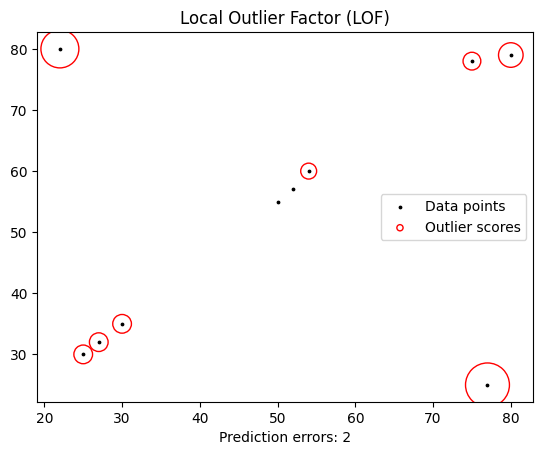

   ID   X   Y  LOF_Prediction  LOF_Score
0   1  25  30               1  -1.034885
1   2  27  32               1  -1.034885
2   3  30  35               1  -1.034885
3   4  50  55               1  -0.955585
4   5  52  57               1  -0.955585
5   6  54  60               1  -1.013031
6   7  75  78               1  -1.027113
7   8  80  79               1  -1.092588
8   9  22  80              -1  -1.282208
9  10  77  25              -1  -1.393050


In [2]:
%pip install scikit-learn -qq
%pip install matplotlib -qq
from sklearn.neighbors import LocalOutlierFactor
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerPathCollection

# Load data dari file CSV
data = pd.read_csv("LOF-Data.csv")
X = data[["X", "Y"]].values  # Ambil kolom X dan Y sebagai fitur

# Inisialisasi model LOF dengan k=3 dan contamination=0.2
clf = LocalOutlierFactor(n_neighbors=3, contamination=0.2)
# Prediksi outlier (1 untuk inlier, -1 untuk outlier)
y_pred = clf.fit_predict(X)
# Skor outlier (semakin kecil, semakin outlier)
X_scores = clf.negative_outlier_factor_

# Visualisasi hasil
def update_legend_marker_size(handle, orig):
    "Customize size of the legend marker"
    handle.update_from(orig)
    handle.set_sizes([20])


plt.scatter(X[:, 0], X[:, 1], color="k", s=3.0, label="Data points")
# Plot lingkaran dengan radius proporsional terhadap skor outlier
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
scatter = plt.scatter(
    X[:, 0],
    X[:, 1],
    s=1000 * radius,
    edgecolors="r",
    facecolors="none",
    label="Outlier scores",
)
plt.axis("tight")
plt.xlabel("Prediction errors: %d" %
        (y_pred[y_pred == -1].size))  # Jumlah outlier
plt.legend(
    handler_map={scatter: HandlerPathCollection(
        update_func=update_legend_marker_size)}
)
plt.title("Local Outlier Factor (LOF)")
plt.show()

# Output hasil prediksi
data["LOF_Prediction"] = y_pred
data["LOF_Score"] = X_scores
print(data)

## Kesimpulan: Perbandingan Perhitungan Manual dan Python

### 1. Perhitungan Manual:
Pada perhitungan manual, kita menghitung LOF untuk setiap titik dengan langkah-langkah berikut:

- Menghitung jarak Euclidean antara titik.
- Menentukan tetangga terdekat (k=3).
- Menghitung Reachability Distance (RD).
- Menghitung Local Reachability Density (LRD).
- Menghitung LOF sebagai rata-rata rasio LRD tetangga terhadap LRD titik itu sendiri.

Hasil manual menunjukkan bahwa Titik 9 dan Titik 10 memiliki nilai LOF tertinggi (3.206 dan 2.042), yang mengindikasikan mereka sebagai outlier.

### 2. Perhitungan Menggunakan Python (sklearn):
Python menggunakan algoritma LOF yang dioptimalkan dalam library sklearn.

- Hasil dari Python menunjukkan bahwa Titik 9 dan Titik 10 juga diidentifikasi sebagai outlier (dengan prediksi -1).
- Skor LOF dari Python (negative_outlier_factor_) menunjukkan bahwa titik-titik ini memiliki skor yang sangat rendah (semakin negatif, semakin outlier), yang konsisten dengan hasil manual.

### 3. Perbandingan:
- **Konsistensi**: Hasil dari perhitungan manual dan Python konsisten dalam mengidentifikasi Titik 9 dan Titik 10 sebagai outlier.
- **Perbedaan**: Perhitungan manual lebih memakan waktu dan rentan terhadap kesalahan, sedangkan Python (sklearn) memberikan hasil yang cepat dan akurat.
- **Skor LOF**: Skor LOF dari Python (negative_outlier_factor_) adalah versi terbalik dari skor LOF manual. Semakin negatif skor, semakin outlier titik tersebut.

### 4. Kesimpulan Umum:
- Titik 9 (22, 80) dan Titik 10 (77, 25) adalah outlier berdasarkan kedua metode.
- Perhitungan manual dan Python (sklearn) memberikan hasil yang konsisten, tetapi Python lebih efisien dan direkomendasikan untuk dataset yang lebih besar.
- Visualisasi dari Python membantu memahami distribusi outlier dengan lebih baik.
